**Question 1**

In [15]:
#  7-digit student ID
student_id = 1234567

# random digit to append
random_digit = 8


# Concatenate the student ID and the random digit to form an 8-digit number
number = str(student_id) + str(random_digit)
print ("The number is :" + str(number))

# Calculate the probabilities
p1 = int(number[:2]) / 100
print(number[:2])
p2 = int(number[2:4]) / 100
print(number[2:4])
p3 = int(number[4:6]) / 100
print(number[4:6])
p4 = int(number[6:]) / 100
print(number[6:])

# Print the probabilities
print(f"p1 = {p1:.2f}")
print(f"p2 = {p2:.2f}")
print(f"p3 = {p3:.2f}")
print(f"p4 = {p4:.2f}")

The number is :30766548
30
76
65
48
p1 = 0.30
p2 = 0.76
p3 = 0.65
p4 = 0.48


**2 A**

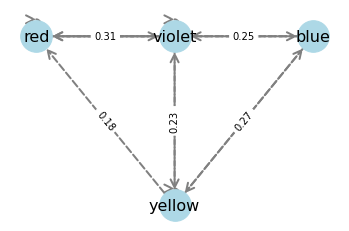

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph to represent the state space
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(['red', 'violet', 'blue', 'yellow'])

# Add edges to the graph with their transition probabilities
G.add_edge('red', 'red', weight=0.24)
G.add_edge('red', 'violet', weight=0.32)
G.add_edge('red', 'blue', weight=0.26)
G.add_edge('violet', 'red', weight=0.31)
G.add_edge('violet', 'violet', weight=0.26)
G.add_edge('violet', 'yellow', weight=0.24)
G.add_edge('blue', 'violet', weight=0.25)
G.add_edge('blue', 'red', weight=0.20)
G.add_edge('blue', 'yellow', weight=0.25)
G.add_edge('yellow', 'red', weight=0.18)
G.add_edge('yellow', 'violet', weight=0.23)
G.add_edge('yellow', 'blue', weight=0.27)
G.add_edge('yellow', 'yellow', weight=0.32)

# Set the positions of the nodes for plotting
pos = {'red': (0, 1), 'violet': (1, 1), 'blue': (2, 1), 'yellow': (1, 0)}

# Draw the graph with labels and edge weights
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue',
                 node_size=1000, font_size=16, width=2, arrowstyle='->',
                 arrowsize=20, edge_color='grey', style='dashed')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Show the plot
plt.axis('off')
plt.show()


**2 B**

In [17]:
import numpy as np

# Create the 4x4 transition matrix
transition_matrix = np.array([[0.24, 0.32, 0.26, 0],
                              [0.31, 0.26, 0, 0.24],
                              [0.2, 0.25, 0, 0.25],
                              [0.18, 0.23, 0.27, 0.32]])

# Calculate the 2-step transition matrix
two_step_matrix = np.linalg.matrix_power(transition_matrix, 2)

# Calculate the 4-step transition matrix
four_step_matrix = np.linalg.matrix_power(transition_matrix, 4)

# Print the transition matrices
print("2-step transition matrix:")
print(two_step_matrix)

print("4-step transition matrix:")
print(four_step_matrix)

2-step transition matrix:
[[0.2088 0.225  0.0624 0.1418]
 [0.1982 0.222  0.1454 0.1392]
 [0.1705 0.1865 0.1195 0.14  ]
 [0.2261 0.2585 0.1332 0.2251]]
4-step transition matrix:
[[0.13089262 0.1452229  0.07208868 0.10158302]
 [0.14164838 0.1569793  0.08056322 0.11069708]
 [0.12459345 0.13824225 0.07068455 0.0983817 ]
 [0.17205009 0.19128965 0.09759526 0.13736219]]


**2 C**

In [18]:
import numpy as np

# Create the 4x4 transition matrix
transition_matrix = np.array([[0.24, 0.32, 0.26, 0],
                              [0.31, 0.26, 0, 0.24],
                              [0.2, 0.25, 0, 0.25],
                              [0.18, 0.23, 0.27, 0.32]])

# Create the initial flower color distribution
init_distribution = np.array([0.33, 0.24, 0.03, 0.4])

# Calculate the distribution of colors after 5 generations
final_distribution = np.linalg.matrix_power(transition_matrix, 5) @ init_distribution

# Print the final distribution of colors
print("Final distribution of colors after 5 generations:")
print(final_distribution)

Final distribution of colors after 5 generations:
[0.10105873 0.11008555 0.09708716 0.13454425]


**2 D**

In [19]:
import numpy as np

# Create the 4x4 transition matrix
transition_matrix = np.array([[0.24, 0.32, 0.26, 0],
                              [0.31, 0.26, 0, 0.24],
                              [0.2, 0.25, 0, 0.25],
                              [0.18, 0.23, 0.27, 0.32]])

# Calculate the eigenvalues and eigenvectors of the transition matrix
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)

# Find the index of the eigenvalue with unit modulus
index = np.argmin(abs(abs(eigenvalues) - 1))

# Find the corresponding eigenvector and normalize it
stationary_distribution = np.real(eigenvectors[:, index].T / np.sum(eigenvectors[:, index]))

# Print the stationary distribution
print("Stationary distribution of colors:")
print(stationary_distribution)

Stationary distribution of colors:
[0.2891061  0.32083113 0.16287137 0.22719141]


**3 A**

In [33]:
import numpy as np

# Define the transition probability matrix
P = np.array([[0.2, 0.1, 0.15, 0, 0.55],
              [0, 1, 0, 0, 0],
              [0.35, 0.2, 0.2, 0.1, 0.15],
              [0, 0, 0, 1, 0],
              [0.25, 0.2, 0.15, 0.25, 0.15]])

# Identify the absorbing and transient states
absorbing_states = []
transient_states = []
for i in range(len(P)):
    if P[i,i] == 1:
        absorbing_states.append(i)
    else:
        transient_states.append(i)

# Separate the matrix into Q and R
Q = P[np.ix_(transient_states, transient_states)]
R = P[np.ix_(transient_states, absorbing_states)]

# Print the matrices Q and R
print("Q = \n", Q)
print("R = \n", R)


Q = 
 [[0.2  0.15 0.55]
 [0.35 0.2  0.15]
 [0.25 0.15 0.15]]
R = 
 [[0.1  0.  ]
 [0.2  0.1 ]
 [0.2  0.25]]


**3 B**

In [34]:
import numpy as np

# Define the transition probability matrix
P = np.array([[0.2, 0.1, 0.15, 0.0, 0.55],
              [0.0, 1.0, 0.0, 0.0, 0.0],
              [0.35, 0.2, 0.2, 0.1, 0.15],
              [0.0, 0.0, 0.0, 1.0, 0.0],
              [0.25, 0.2, 0.15, 0.25, 0.15]])

# Identify the transient states
transient_states = [0, 2, 4]

# Compute the fundamental matrix
N = np.linalg.inv(np.eye(len(transient_states)) - P[np.ix_(transient_states, transient_states)])

# Compute the mean number of times in each transient state, given starting in each state
for i in range(len(transient_states)):
    mean_num_transitions = np.zeros(len(transient_states))
    for j in range(len(transient_states)):
        if N[j].sum() == 0:
            mean_num_transitions[j] = 0
        else:
            mean_num_transitions[j] = N[j][i] / N[j].sum()
    print(f'State {transient_states[i]+1}: {mean_num_transitions}')


State 1: [0.4943609  0.28151261 0.25313283]
State 3: [0.15789474 0.45588235 0.15789474]
State 5: [0.34774436 0.26260504 0.58897243]


**3C**

In [1]:
import numpy as np

# Define the transition matrix
P = np.array([[0.4, 0.6, 0.0, 0.0],
              [0.2, 0.3, 0.5, 0.0],
              [0.0, 0.0, 0.5, 0.5],
              [0.0, 0.0, 0.0, 1.0]])

# Find the transient and absorbing states
transient_states = np.where(np.diag(P) == 0)[0]
absorbing_states = np.where(np.diag(P) == 1)[0]

# Compute the fundamental matrix
N = np.linalg.inv(np.eye(len(transient_states)) - P[np.ix_(transient_states, transient_states)])

# Compute the mean number of transitions from each transient state to an absorbing state
for i in range(len(transient_states)):
    mean_num_transitions = np.zeros(len(absorbing_states))
    for j in range(len(absorbing_states)):
        mean_num_transitions[j] = N[i][j + len(transient_states)] / N[i].sum()
    print(f'State {transient_states[i]}: {mean_num_transitions.mean()}')


**3D**

In [ ]:
import numpy as np

# Define the transition probability matrix
P = np.array([[0.4, 0.3, 0.3, 0.0],
              [0.0, 0.2, 0.5, 0.3],
              [0.2, 0.0, 0.3, 0.5],
              [0.0, 0.0, 0.0, 1.0]])

# Find the indices of the transient and absorbing states
transient_states = np.where(np.diag(P) == 0)[0]
absorbing_states = np.where(np.diag(P) == 1)[0]

# Compute the fundamental matrix
N = np.linalg.inv(np.eye(len(transient_states)) - P[np.ix_(transient_states, transient_states)])

# Find the probability of ending in each absorbing state
for i in range(len(transient_states)):
    prob_end_absorbing = N[i, np.ix_(absorbing_states)]
    print(f'State {transient_states[i]}: {prob_end_absorbing}')


**4 A**

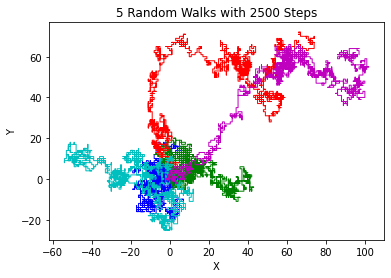

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters of the random walk
p1, p2, p3, p4 = 0.25, 0.25, 0.25, 0.25
num_steps = 2500
num_walks = 5

# Create an array to store the positions of each random walk
positions = np.zeros((num_walks, num_steps, 2))

# Simulate the random walks
for i in range(num_walks):
    position = np.array([0, 0])
    for j in range(num_steps):
        # Generate a random number to determine the direction of the next step
        rand = np.random.rand()
        if rand < p1:
            position += np.array([0, 1])
        elif rand < p1 + p2:
            position += np.array([0, -1])
        elif rand < p1 + p2 + p3:
            position += np.array([1, 0])
        else:
            position += np.array([-1, 0])
        positions[i, j] = position

# Plot the random walks
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(num_walks):
    plt.plot(positions[i,:,0], positions[i,:,1], color=colors[i], linewidth=1)

plt.title(f'{num_walks} Random Walks with {num_steps} Steps')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**B**

In [ ]:
import numpy as np

# Get the input from the user
num_steps = int(input("Enter the number of steps: "))
p1, p2, p3, p4 = map(float, input("Enter the probabilities of moving in each direction (separated by spaces): ").split())
num_walks = int(input("Enter the number of walks: "))

# Create an array to store the positions of each random walk
positions = np.zeros((num_walks, num_steps, 2))

# Simulate the random walks
for i in range(num_walks):
    position = np.array([0, 0])
    for j in range(num_steps):
        # Generate a random number to determine the direction of the next step
        rand = np.random.rand()
        if rand < p1:
            position += np.array([0, 1])
        elif rand < p1 + p2:
            position += np.array([0, -1])
        elif rand < p1 + p2 + p3:
            position += np.array([1, 0])
        else:
            position += np.array([-1, 0])
        positions[i, j] = position

# Compute the distances of each random walk from the starting point
distances = np.sqrt(np.sum(positions**2, axis=2))

# Compute the average distance over all random walks
expected_length = np.mean(distances[:, -1])

print(f"Expected length of the walk after {num_steps} steps: {expected_length:.2f}")

Enter the number of steps: 2500
Enter the probabilities of moving in each direction (separated by spaces): 0.25 0.25 0.25 0.25
Enter the number of walks: 10000
Expected length of the walk after 2500 steps: 44.36


**5**

In [ ]:
import numpy as np

# Define parameters
a = 0.5
b = 1.0
T = 1.0
N = 2500
dt = T/N

# Generate Wiener process
dW = np.sqrt(dt) * np.random.normal(size=N)

# Initialise arrays for S and t
S = np.zeros(N+1)
t = np.linspace(0, T, N+1)

# Set initial condition
S[0] = 0

# Simulate the random walk
for i in range(N):
    S[i+1] = S[i] + a*dt + b*dW[i]

# Estimate expected value
mean_S = np.mean(S)

print("Expected value of S after 2500 steps: ", mean_S)

Expected value of S after 2500 steps:  0.04056246901183116


**6**

In [ ]:
import random
import math

# Define the radius of the circle
r = 1.0

# Define the number of points to generate in each chain
num_points = 10**6

# Define the burn-in period for each chain
burn_in = 1000

# Define a function to calculate the distance between two points
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Generate 5 Markov Chains
for chain in range(5):
    # Initialize counters for the number of points within the circle and total number of points
    count_in_circle = 0
    count_total = 0

    # Run the chain for a large number of steps
    for step in range(num_points + burn_in):
        # Randomly select a point within the square
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Calculate the distance between the selected point and the center of the circle
        d = distance(x, y, 0, 0)

        # Check if the point is within the circle
        if d <= r:
            count_in_circle += 1
        
        # Increment the total number of points
        count_total += 1
        
        # Calculate the estimate of pi/4 after the burn-in period
        if step == burn_in + num_points - 1:
            pi_estimate = 4 * count_in_circle / count_total
            print(f"Chain {chain + 1}: π ≈ {pi_estimate}")

Chain 1: π ≈ 3.1415704295704296
Chain 2: π ≈ 3.141842157842158
Chain 3: π ≈ 3.1452987012987013
Chain 4: π ≈ 3.141838161838162
Chain 5: π ≈ 3.1433886113886116


In [ ]:
import random
import math
import numpy as np

# Define the radius of the circle
r = 1.0

# Define the number of points to generate in each chain
num_points = 10**6

# Define the burn-in period for each chain
burn_in = 1000

# Define a function to calculate the distance between two points
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Initialize a list to store the estimates of pi for each chain
pi_estimates = []

# Generate 5 Markov Chains
for chain in range(5):
    # Initialize counters for the number of points within the circle and total number of points
    count_in_circle = 0
    count_total = 0

    # Initialize a list to store the estimates of pi for each step after the burn-in period
    pi_steps = []

    # Run the chain for a large number of steps
    for step in range(num_points + burn_in):
        # Randomly select a point within the square
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Calculate the distance between the selected point and the center of the circle
        d = distance(x, y, 0, 0)

        # Check if the point is within the circle
        if d <= r:
            count_in_circle += 1
        
        # Increment the total number of points
        count_total += 1
        
        # Calculate the estimate of pi/4 after the burn-in period
        if step >= burn_in:
            pi_estimate = 4 * count_in_circle / count_total
            pi_steps.append(pi_estimate)

    # Save the list of estimates of pi for this chain
    pi_estimates.append(pi_steps)

# Calculate the within-chain variance and correlation for each chain
for chain in range(5):
    var_within = np.var(pi_estimates[chain])
    corr_within = np.corrcoef(pi_estimates[chain][:-1], pi_estimates[chain][1:])[0, 1]
    print(f"Chain {chain + 1}: within-chain variance = {var_within:.4f}, within-chain correlation = {corr_within:.4f}")

# Calculate the between-chain variance and correlation
pi_means = np.mean(pi_estimates, axis=1)
var_between = np.var(pi_means)
corr_between = np.corrcoef(pi_means[:-1], pi_means[1:])[0, 1]
print(f"Between-chain variance = {var_between:.4f}, between-chain correlation = {corr_between:.4f}")

Chain 1: within-chain variance = 0.0000, within-chain correlation = 0.9998
Chain 2: within-chain variance = 0.0000, within-chain correlation = 0.9999
Chain 3: within-chain variance = 0.0000, within-chain correlation = 0.9999
Chain 4: within-chain variance = 0.0000, within-chain correlation = 0.9998
Chain 5: within-chain variance = 0.0000, within-chain correlation = 0.9997
Between-chain variance = 0.0000, between-chain correlation = -0.1352
